In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스부호 깨짐 방지 설정

In [2]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
test_df = pd.read_csv('./open/test.csv')
test_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [4]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판다.

train_df[train_df['주택소유상태']== 'ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [5]:
train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [6]:
train_df.shape

(96293, 15)

In [7]:
# 근로기간 컬럼 중복된 항목 합치기

In [8]:
# 함수 선언

def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year') :
        return '1년이하'
    else:
        return 'Unknown'

In [9]:
# train set, test set에 적용

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)
test_df['근로기간'] = test_df['근로기간'].apply(unit_standardization)

In [10]:
# 대출기간 범주형 --> 수치형으로 변경

In [11]:
# 함수 선언

def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [12]:
# train set, test set에 적용

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)
test_df['대출기간'] = test_df['대출기간'].apply(conv_loan_period)

In [13]:
display(train_df.head(3))
display(test_df.head(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10년이상,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36,8,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36,5,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36,6,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0


In [14]:
# 범주형 데이터 인코딩하기 : 대출목적, 주택소유상태, 근로기간 -> 원핫인코딩 하기

In [15]:
train_df['대출목적'].value_counts()

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4724
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

In [16]:
test_df['대출목적'].value_counts()

대출목적
부채 통합     37054
신용 카드     16204
주택 개선      4019
기타         3032
주요 구매      1244
의료          696
소규모 사업      541
자동차         536
이사          362
휴가          294
주택          185
재생 에너지       29
결혼            1
Name: count, dtype: int64

In [17]:
# train set, test set에 적용
# 대출목적 컬럼에서 train set에는 없는 '결혼'항목이 test set에는 있는 것으로 확인 

# train set에 우선 적용
train_encoded = pd.get_dummies(train_df, columns=['주택소유상태', '근로기간', '대출목적'], prefix='en')
train_encoded.head(3)

,ID,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,...,en_소규모 사업,en_신용 카드,en_의료,en_이사,en_자동차,en_재생 에너지,en_주요 구매,en_주택,en_주택 개선,en_휴가
0,TRAIN_00000,12480000,36,72000000,18.90,15,0,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,TRAIN_00001,14400000,60,130800000,22.33,21,0,373572,234060.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,TRAIN_00002,12000000,36,96000000,8.60,14,0,928644,151944.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [18]:
train_encoded['en_결혼'] = 0
train_encoded.head(3)

,ID,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,...,en_신용 카드,en_의료,en_이사,en_자동차,en_재생 에너지,en_주요 구매,en_주택,en_주택 개선,en_휴가,en_결혼
0,TRAIN_00000,12480000,36,72000000,18.90,15,0,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
1,TRAIN_00001,14400000,60,130800000,22.33,21,0,373572,234060.0,0.0,...,False,False,False,False,False,False,False,True,False,0
2,TRAIN_00002,12000000,36,96000000,8.60,14,0,928644,151944.0,0.0,...,False,False,False,False,False,False,False,False,False,0


In [19]:
# test set에 적용

test_encoded = pd.get_dummies(test_df, columns=['주택소유상태', '근로기간', '대출목적'], prefix='en')
test_encoded.head(3)

,ID,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,...,en_소규모 사업,en_신용 카드,en_의료,en_이사,en_자동차,en_재생 에너지,en_주요 구매,en_주택,en_주택 개선,en_휴가
0,TEST_00000,16800000,36,132000000,19.64,12,0,394692,146604.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,TEST_00001,8400000,36,89971200,15.84,25,0,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,TEST_00002,17280000,36,150000000,8.41,20,0,1786980,281820.0,0.0,...,False,True,False,False,False,False,False,False,False,False


In [20]:
order = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'en_MORTGAGE', 'en_OWN',
       'en_RENT', 'en_1', 'en_10년이상', 'en_1년이하', 'en_2', 'en_3', 'en_4',
       'en_5', 'en_6', 'en_7', 'en_8', 'en_9', 'en_Unknown', 'en_기타',
       'en_부채 통합', 'en_소규모 사업', 'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차',
       'en_재생 에너지', 'en_주요 구매', 'en_주택', 'en_주택 개선', 'en_휴가', 'en_결혼']

In [21]:
# test set 컬럼순서를 train set과 동일하게 변경해줌

test_encoded = test_encoded[order]

In [22]:
test_encoded.head(3)

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,...,en_신용 카드,en_의료,en_이사,en_자동차,en_재생 에너지,en_주요 구매,en_주택,en_주택 개선,en_휴가,en_결혼
0,16800000,36,132000000,19.64,12,0,394692,146604.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1,8400000,36,89971200,15.84,25,0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,17280000,36,150000000,8.41,20,0,1786980,281820.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False


In [23]:
# shap import

import shap

In [24]:
# target(y)값 라벨 인코딩 하기

from sklearn.preprocessing import LabelEncoder

In [25]:
# LabelEncoder 인스턴스 생성 및 인코딩
label_encoder = LabelEncoder()
train_encoded['대출등급'] = label_encoder.fit_transform(train_encoded['대출등급'])

In [26]:
# 부채_대비_소득_비율 컬럼의 이상치 제거없이, log scaling, standardscaling 없이 그냥 머신러닝 해보기

In [27]:
# train set을 train과 test로 나누기

from sklearn.model_selection import train_test_split

In [28]:
train_encoded.columns

Index(['ID', '대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', 'en_MORTGAGE', 'en_OWN',
       'en_RENT', 'en_1', 'en_10년이상', 'en_1년이하', 'en_2', 'en_3', 'en_4',
       'en_5', 'en_6', 'en_7', 'en_8', 'en_9', 'en_Unknown', 'en_기타',
       'en_부채 통합', 'en_소규모 사업', 'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차',
       'en_재생 에너지', 'en_주요 구매', 'en_주택', 'en_주택 개선', 'en_휴가', 'en_결혼'],
      dtype='object')

In [29]:
x_list = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'en_MORTGAGE', 'en_OWN',
       'en_RENT', 'en_1', 'en_10년이상', 'en_1년이하', 'en_2', 'en_3', 'en_4',
       'en_5', 'en_6', 'en_7', 'en_8', 'en_9', 'en_Unknown', 'en_기타',
       'en_부채 통합', 'en_소규모 사업', 'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차',
       'en_재생 에너지', 'en_주요 구매', 'en_주택', 'en_주택 개선', 'en_휴가', 'en_결혼']

In [30]:
X = train_encoded[x_list] 
y = train_encoded['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67405, 38)
(28888, 38)
(67405,)
(28888,)


In [32]:
# 머신러닝모델, 결과 평가 메소드 불러오기

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, f1_score

In [33]:
model_rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=200)
model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.000000,1.000000
test,0.738196,0.730553


In [34]:
# XGBClassifier 모델 

model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.000000,1.000000
test,0.880954,0.880285


In [35]:
# feature importance를 보면서 해보자

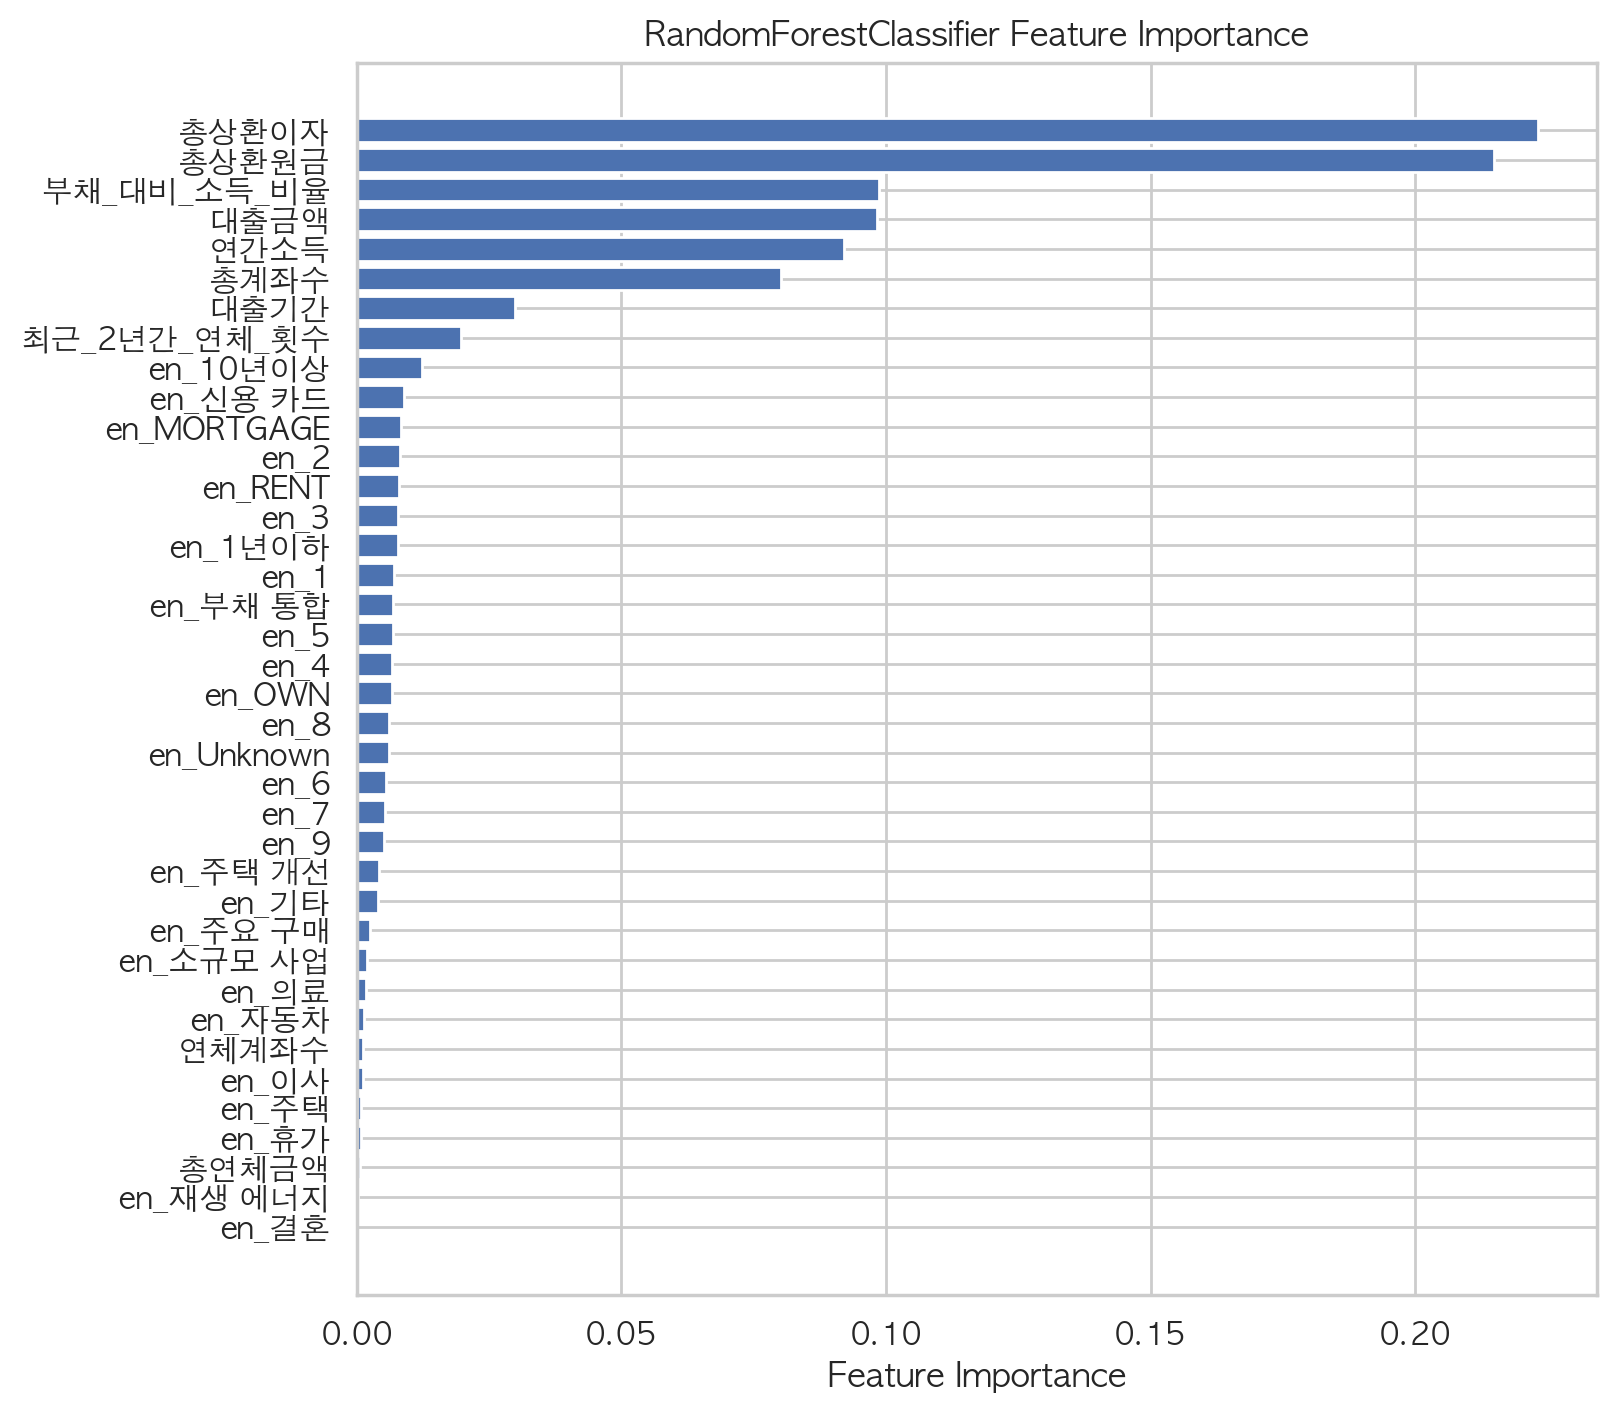

,accuracy,F1
train,1.000000,1.000000
test,0.738196,0.730553


In [36]:
# RandomForestClassifier 모델 + feature importance와 함께

model_rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=200)
model_rf.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = model_rf.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('RandomForestClassifier Feature Importance')
plt.show()

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

In [37]:
feature_importance_df

,Feature,Importance
37,en_결혼,0.000000
32,en_재생 에너지,0.000199
8,총연체금액,0.000607
36,en_휴가,0.000846
34,en_주택,0.000867
30,en_이사,0.001081
9,연체계좌수,0.001152
31,en_자동차,0.001383
29,en_의료,0.001687
27,en_소규모 사업,0.001943


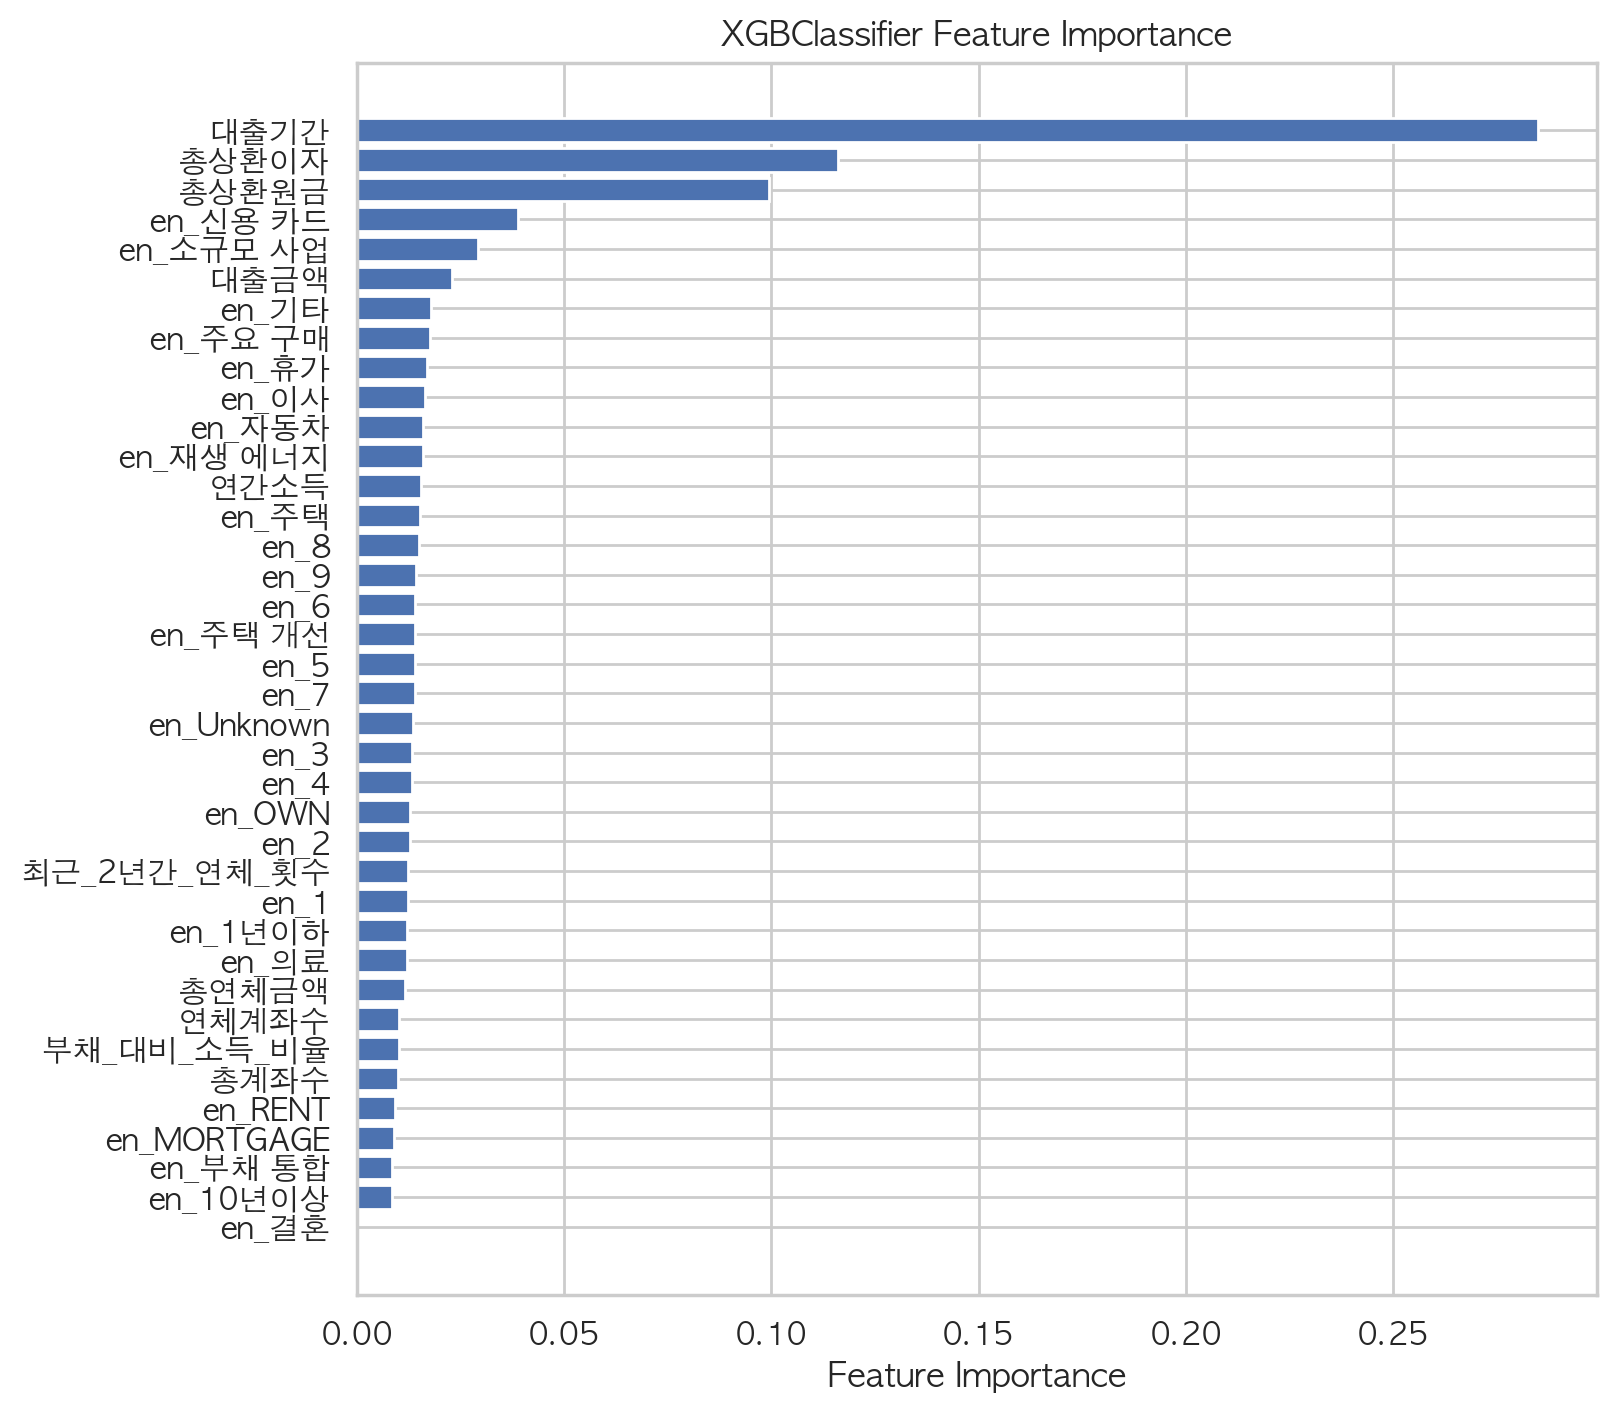

,accuracy,F1
train,1.000000,1.000000
test,0.880954,0.880285


In [38]:
# XGBClassifier 모델 생성 + feature importance와 함께

model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

# 피처 중요도 얻기
feature_importances = model_xgb.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBClassifier Feature Importance')
plt.show()

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

In [39]:
feature_importance_df

,Feature,Importance
37,en_결혼,0.000000
14,en_10년이상,0.008368
26,en_부채 통합,0.008497
10,en_MORTGAGE,0.008845
12,en_RENT,0.009241
4,총계좌수,0.010009
3,부채_대비_소득_비율,0.010094
9,연체계좌수,0.010167
8,총연체금액,0.011677
29,en_의료,0.012065


In [40]:
# DecisionTreeClassifier 모델 생성 + feature importance와 함께 해보기

In [41]:
# 우선 DecisionTreeClassifier 모델만 

model_dtc = DecisionTreeClassifier(max_depth=12, random_state = 42)
model_dtc.fit(X_train, y_train)

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.861212,0.861320
test,0.813140,0.812574


In [42]:
model_dtc = DecisionTreeClassifier(max_depth=13, random_state = 42)
model_dtc.fit(X_train, y_train)

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.881359,0.881508
test,0.821379,0.820802


In [43]:
model_dtc = DecisionTreeClassifier(max_depth=14, random_state = 42)
model_dtc.fit(X_train, y_train)

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.903909,0.904088
test,0.828129,0.827523


In [44]:
model_dtc = DecisionTreeClassifier(max_depth=15, random_state = 42)
model_dtc.fit(X_train, y_train)

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.918433,0.918664
test,0.831903,0.831320


In [45]:
# 현재로써는 max_depth=16일 때 제일 성능이 좋은 것 같다

model_dtc = DecisionTreeClassifier(max_depth=16, random_state = 42)
model_dtc.fit(X_train, y_train)

y_pred_train = model_dtc.predict(X_train)
y_pred_test = model_dtc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.933966,0.934137
test,0.834499,0.833871


In [49]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state = 42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

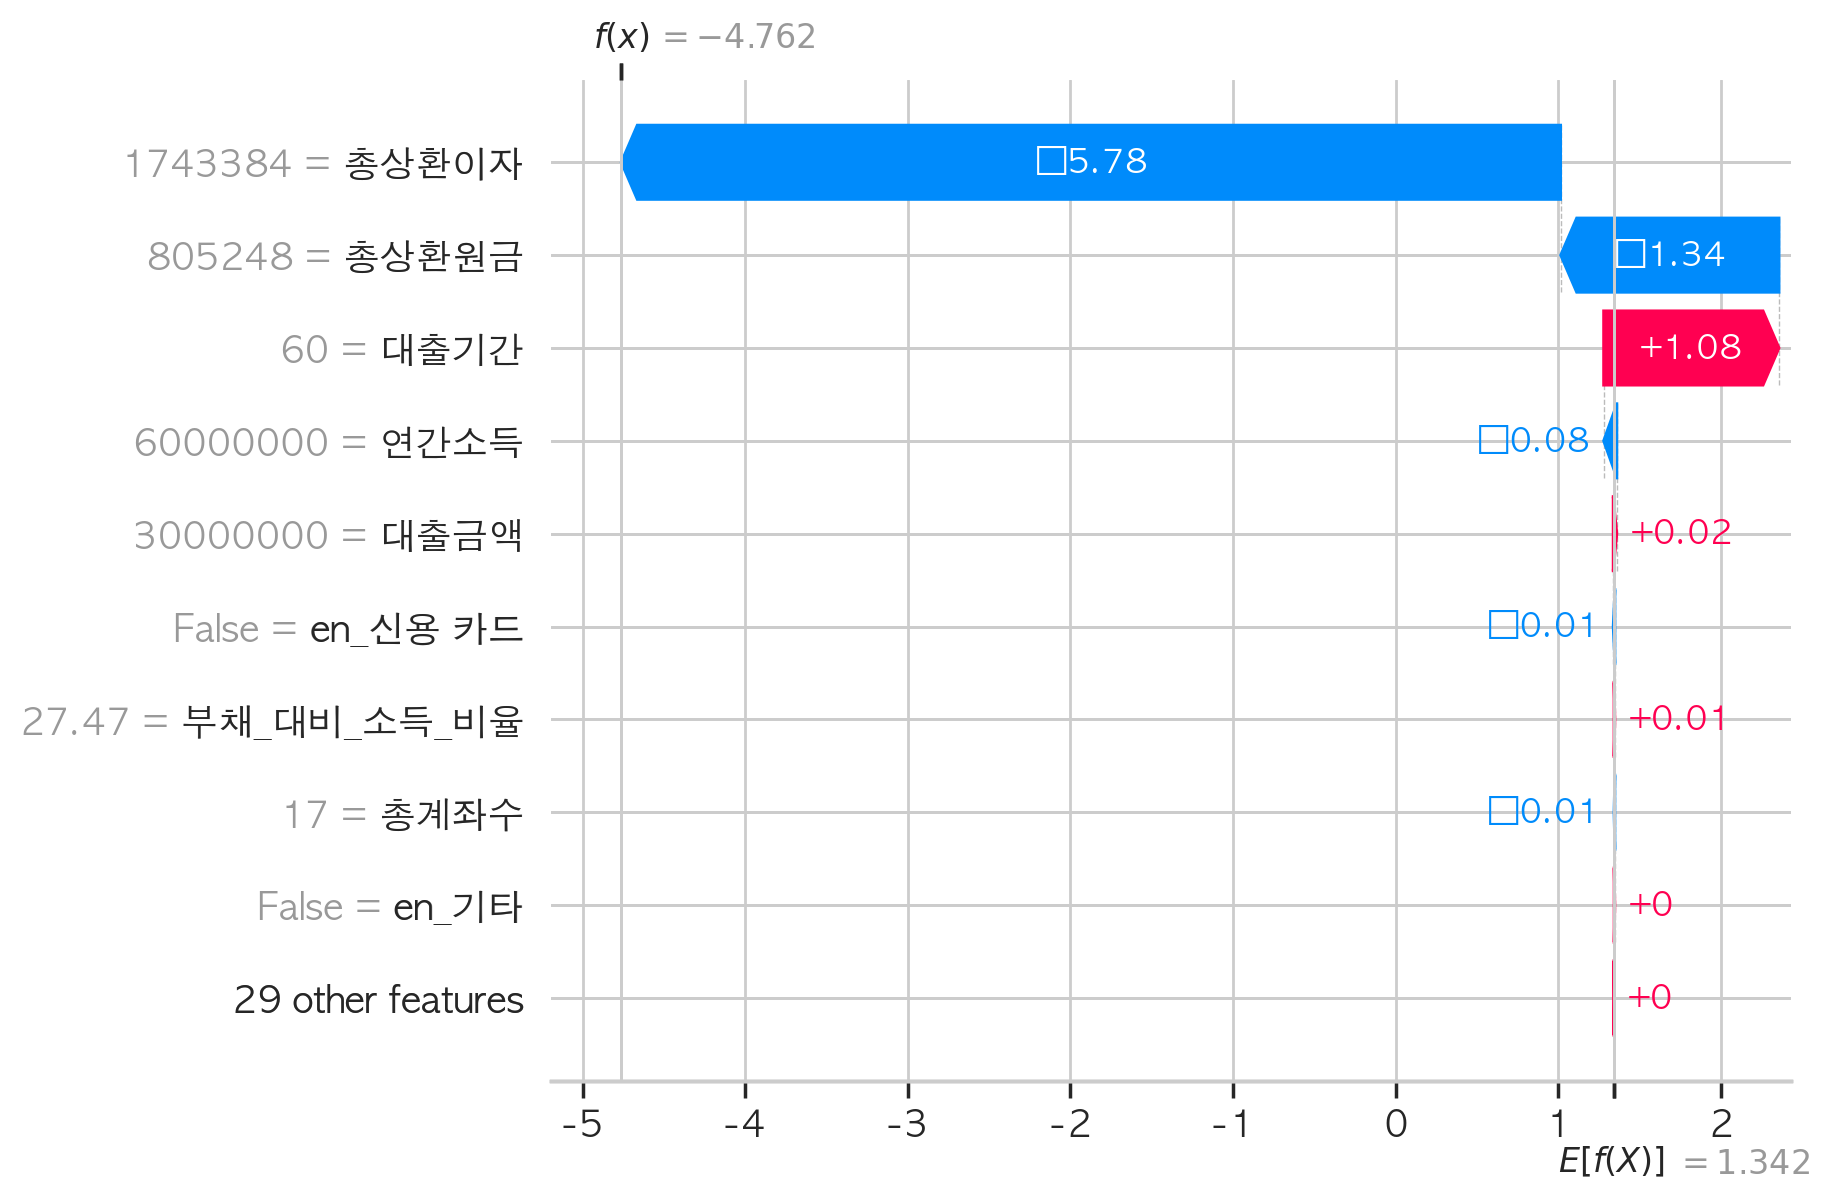

In [50]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0,:,1])

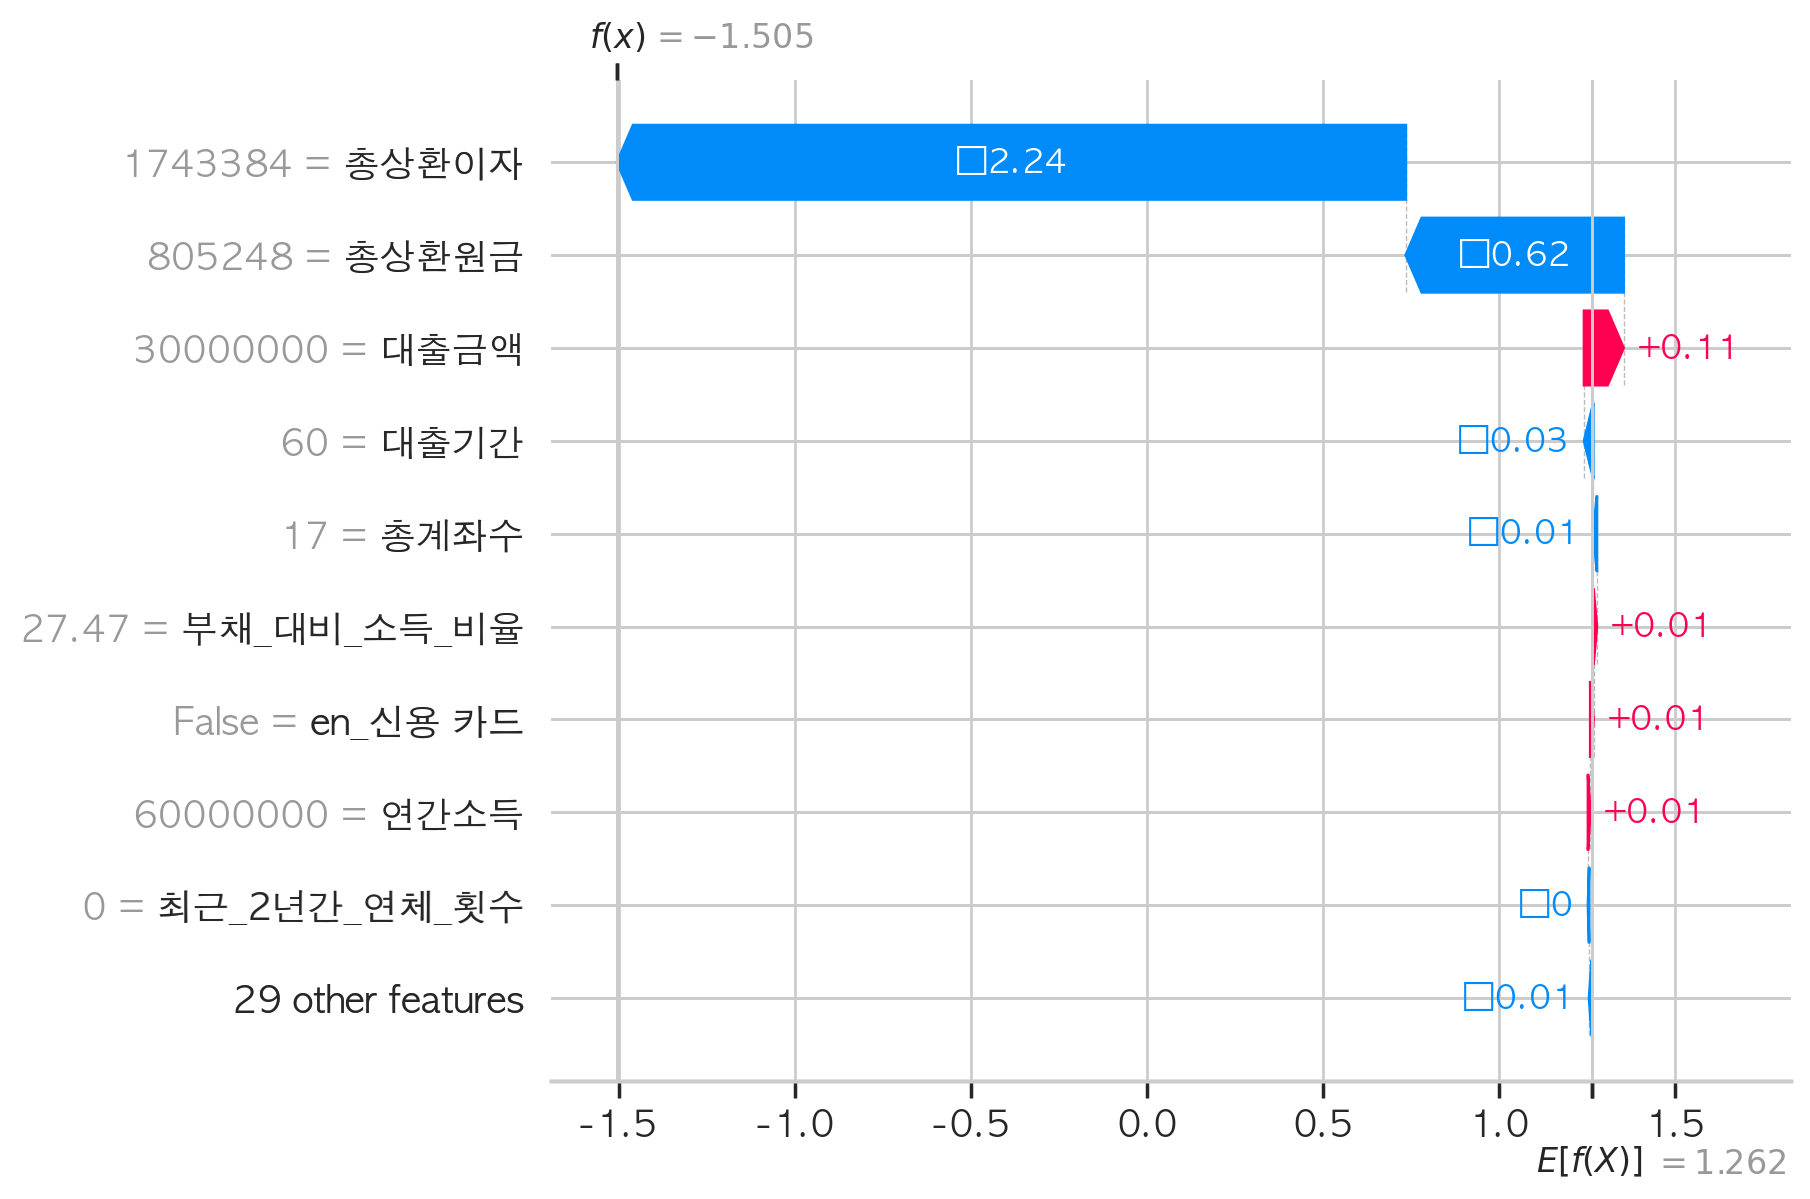

In [51]:
shap.plots.waterfall(shap_values[0,:,2])

In [52]:
# 여기서부터 전처리 방식 변경하여 다시 모델링----------------------------------

In [53]:
# 부채대비 소득비율 이상치 제거하고 모델링 해보기

In [54]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [55]:
test_df = pd.read_csv('./open/test.csv')
test_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [56]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판다.

train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [57]:
# 근로기간 같은 의미 다른 항목 통합

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)
test_df['근로기간'] = test_df['근로기간'].apply(unit_standardization)

In [58]:
# 대출기간 수치형으로 번경

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)
test_df['대출기간'] = test_df['대출기간'].apply(conv_loan_period)

In [59]:
# 원핫 인코딩

# train set 적용
train_encoded = pd.get_dummies(train_df, columns=['주택소유상태', '근로기간', '대출목적'], prefix='en')
train_encoded['en_결혼'] = 0

# test set에 적용
test_encoded = pd.get_dummies(test_df, columns=['주택소유상태', '근로기간', '대출목적'], prefix='en')

In [60]:
train_encoded.shape

(96293, 40)

In [61]:
order = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'en_MORTGAGE', 'en_OWN',
       'en_RENT', 'en_1', 'en_10년이상', 'en_1년이하', 'en_2', 'en_3', 'en_4',
       'en_5', 'en_6', 'en_7', 'en_8', 'en_9', 'en_Unknown', 'en_기타',
       'en_부채 통합', 'en_소규모 사업', 'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차',
       'en_재생 에너지', 'en_주요 구매', 'en_주택', 'en_주택 개선', 'en_휴가', 'en_결혼']

In [62]:
len(order)

38

In [63]:
# test set 컬럼순서를 train set과 동일하게 변경해줌

test_encoded = test_encoded[order]

In [64]:
train_encoded = train_encoded[train_encoded['부채_대비_소득_비율'] != 9999.0]

In [65]:
# LabelEncoder 인스턴스 생성 및 인코딩
label_encoder = LabelEncoder()
train_encoded['대출등급'] = label_encoder.fit_transform(train_encoded['대출등급'])

In [66]:
# train set을 train과 test로 나누기

x_list = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'en_MORTGAGE', 'en_OWN',
       'en_RENT', 'en_1', 'en_10년이상', 'en_1년이하', 'en_2', 'en_3', 'en_4',
       'en_5', 'en_6', 'en_7', 'en_8', 'en_9', 'en_Unknown', 'en_기타',
       'en_부채 통합', 'en_소규모 사업', 'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차',
       'en_재생 에너지', 'en_주요 구매', 'en_주택', 'en_주택 개선', 'en_휴가', 'en_결혼']

In [67]:
X = train_encoded[x_list] 
y = train_encoded['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [68]:
# LogisticRegression 모델 

model_lor = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lor.fit(X_train, y_train)

y_pred_train = model_lor.predict(X_train)
y_pred_test = model_lor.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.399546,0.341418
test,0.397016,0.339431


In [69]:
# RandomForestClassifier 모델  

model_rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=200)
model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.000000,1.00000
test,0.738092,0.73086


In [70]:
# XGBClassifier 모델 

model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.000000,1.000000
test,0.880123,0.879427
